In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
Raw_Housing_Data=pd.read_csv('/content/drive/MyDrive/Classrooms internshala/M3T2_helper_text.zip')
Raw_Housing_Data

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,...,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
0,7129300520,14 October 2017,221900.0,3,1.00,1180.0,5650.0,1.0,No,None,...,7,1180.0,0,63,0,98178.0,47.5112,-122.257,1340.0,5650
1,6414100192,14 December 2017,538000.0,3,2.25,2570.0,7242.0,2.0,No,None,...,7,2170.0,400,67,1991,98125.0,47.7210,-122.319,1690.0,7639
2,5631500400,15 February 2016,180000.0,2,1.00,770.0,10000.0,1.0,No,None,...,6,770.0,0,85,0,98028.0,47.7379,-122.233,2720.0,8062
3,2487200875,14 December 2017,604000.0,4,3.00,1960.0,5000.0,1.0,No,None,...,7,1050.0,910,53,0,98136.0,47.5208,-122.393,1360.0,5000
4,1954400510,15 February 2016,510000.0,3,2.00,1680.0,8080.0,1.0,No,None,...,8,1680.0,0,31,0,98074.0,47.6168,-122.045,1800.0,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,14 May 2017,360000.0,3,2.50,1530.0,1131.0,3.0,No,None,...,8,1530.0,0,9,0,98103.0,47.6993,-122.346,1530.0,1509
21609,6600060120,15 February 2016,400000.0,4,2.50,2310.0,5813.0,2.0,No,None,...,8,2310.0,0,4,0,98146.0,47.5107,-122.362,1830.0,7200
21610,1523300141,14 June 2017,402101.0,2,0.75,1020.0,1350.0,2.0,No,None,...,7,1020.0,0,9,0,98144.0,47.5944,-122.299,1020.0,2007
21611,291310100,15 January 2016,400000.0,3,2.50,1600.0,2388.0,2.0,No,None,...,8,1600.0,0,14,0,98027.0,47.5345,-122.069,1410.0,1287


In [ ]:
Raw_Housing_Data['Sale Price'].head(10)

0     221900.0
1     538000.0
2     180000.0
3     604000.0
4     510000.0
5    1230000.0
6     257500.0
7     291850.0
8     229500.0
9     323000.0
Name: Sale Price, dtype: float64

In [ ]:
Raw_Housing_Data['Sale Price'].tail(10)

21603     507250.0
21604     429000.0
21605     610685.0
21606    1010000.0
21607     475000.0
21608     360000.0
21609     400000.0
21610     402101.0
21611     400000.0
21612     325000.0
Name: Sale Price, dtype: float64

In [ ]:
Raw_Housing_Data['Sale Price'].describe()

count    2.160900e+04
mean     5.401984e+05
std      3.673890e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: Sale Price, dtype: float64

In [ ]:
import seaborn as sns

<Axes: xlabel='Sale Price'>

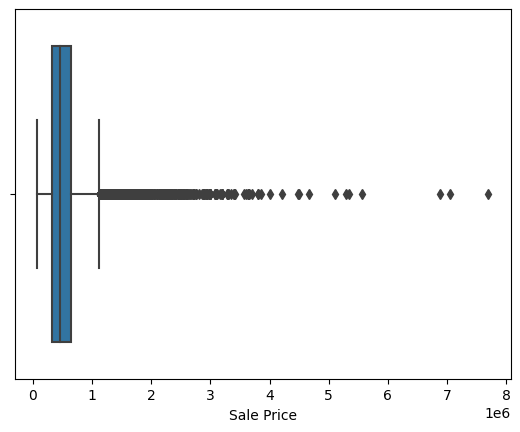

In [ ]:
sns.boxplot(x=Raw_Housing_Data['Sale Price'])

In [ ]:
#applying imputing method to remove outlier
q1=Raw_Housing_Data['Sale Price'].quantile(.25)
q3=Raw_Housing_Data['Sale Price'].quantile(.75)

In [ ]:
iqr=q3-q1

In [ ]:
upper_limit=q3+1.5*iqr
lower_limit=q1-1.5*iqr

In [ ]:
def limit_imputer(value):
  if value>upper_limit:
    return upper_limit
  if value<lower_limit:
    return lower_limit
  else:
    return value

In [ ]:
Raw_Housing_Data['Sale Price']=Raw_Housing_Data['Sale Price'].apply(limit_imputer)
Raw_Housing_Data['Sale Price'].describe()
#Imputing method executed

count    2.160900e+04
mean     5.116186e+05
std      2.500620e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      1.129575e+06
Name: Sale Price, dtype: float64

In [ ]:
Raw_Housing_Data.dropna(inplace=True, axis=0, subset=['Sale Price'])

In [ ]:
Raw_Housing_Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21609 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         21609 non-null  int64  
 1   Date House was Sold                        21609 non-null  object 
 2   Sale Price                                 21609 non-null  float64
 3   No of Bedrooms                             21609 non-null  int64  
 4   No of Bathrooms                            21605 non-null  float64
 5   Flat Area (in Sqft)                        21600 non-null  float64
 6   Lot Area (in Sqft)                         21600 non-null  float64
 7   No of Floors                               21609 non-null  float64
 8   Waterfront View                            21609 non-null  object 
 9   No of Times Visited                        21609 non-null  object 
 10  Condition of the House

In [ ]:
Raw_Housing_Data.describe()

,ID,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
count,2.160900e+04,2.160900e+04,21609.000000,21605.000000,21600.000000,2.160000e+04,21609.000000,21609.000000,21606.000000,21609.000000,21609.000000,21609.000000,21608.000000,21608.000000,21608.000000,21608.000000,21609.000000
mean,4.580686e+09,5.116186e+05,3.370771,2.114684,2079.943333,1.510953e+04,1.494215,7.623490,1788.351291,291.513490,46.999722,84.417881,98077.939328,47.560050,-122.213874,1986.560024,12769.770790
std,2.876653e+09,2.500620e+05,0.929916,0.770166,918.532579,4.143187e+04,0.539909,1.105519,828.030715,442.570991,29.373317,401.714775,53.507271,0.138560,0.140835,685.442621,27306.508841
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,1.000000,290.000000,0.000000,3.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1429.250000,5.040000e+03,1.000000,7.000000,1190.000000,0.000000,21.000000,0.000000,98033.000000,47.470975,-122.328000,1490.000000,5100.000000
50%,3.904931e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.619000e+03,1.500000,7.000000,1560.000000,0.000000,43.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.069050e+04,2.000000,8.000000,2210.000000,560.000000,67.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10084.000000
max,9.900000e+09,1.129575e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,10.000000,9410.000000,4820.000000,118.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


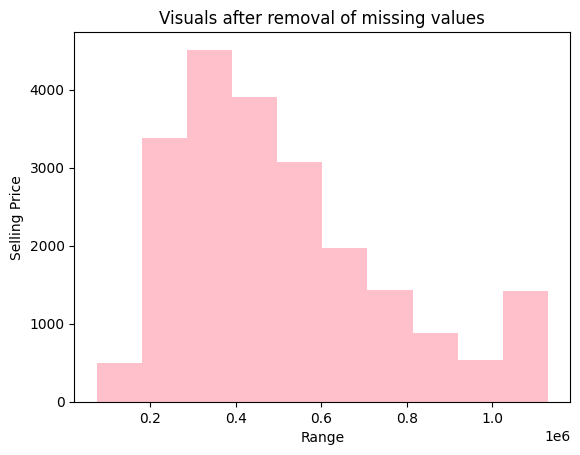

In [ ]:
plt.hist(Raw_Housing_Data['Sale Price'], color='pink')
plt.xlabel('Range')
plt.ylabel('Selling Price')
plt.title('Visuals after removal of missing values')
plt.show()

In [ ]:
import pandas as pd
Raw_Housing_Data=pd.read_csv('/M4T2V4_helper_text.zip')

In [ ]:
Raw_Housing_Data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21609 entries, 0 to 21608
Data columns (total 21 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         21609 non-null  int64  
 1   Date House was Sold                        21609 non-null  object 
 2   Sale Price                                 21609 non-null  float64
 3   No of Bedrooms                             21609 non-null  int64  
 4   No of Bathrooms                            21605 non-null  float64
 5   Flat Area (in Sqft)                        21600 non-null  float64
 6   Lot Area (in Sqft)                         21600 non-null  float64
 7   No of Floors                               21609 non-null  float64
 8   Waterfront View                            21609 non-null  object 
 9   No of Times Visited                        21609 non-null  object 
 10  Condition of the House

In [ ]:
numerical_columns=['No of Bathrooms', 'Flat Area (in Sqft)', 'Lot Area (in Sqft)','Area of the House from Basement (in Sqft)',
                   'Latitude','Longitude','Living Area after Renovation (in Sqft)']

In [ ]:
from sklearn.impute import SimpleImputer
import numpy as np
#when column 'Zipcode is not involved'

imputer=SimpleImputer(missing_values=np.nan, strategy='median')
Raw_Housing_Data[numerical_columns]=imputer.fit_transform(Raw_Housing_Data[numerical_columns])
Raw_Housing_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21609 entries, 0 to 21608
Data columns (total 21 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         21609 non-null  int64  
 1   Date House was Sold                        21609 non-null  object 
 2   Sale Price                                 21609 non-null  float64
 3   No of Bedrooms                             21609 non-null  int64  
 4   No of Bathrooms                            21609 non-null  float64
 5   Flat Area (in Sqft)                        21609 non-null  float64
 6   Lot Area (in Sqft)                         21609 non-null  float64
 7   No of Floors                               21609 non-null  float64
 8   Waterfront View                            21609 non-null  object 
 9   No of Times Visited                        21609 non-null  object 
 10  Condition of the House

In [ ]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings(action='ignore')
#Data exploration- independent variable part 2

In [ ]:
Raw_Housing_Data=pd.read_csv('/content/drive/MyDrive/Classrooms internshala/raw 3/Raw_Housing_Prices3.csv')

In [ ]:
Raw_Housing_Data.head()

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,...,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
0,7129300520,14 October 2017,221900.0,3,1.00,1180.0,5650.0,1.0,No,None,...,7,1180.0,0,63,0,98178.0,47.5112,-122.257,1340.0,5650
1,6414100192,14 December 2017,538000.0,3,2.25,2570.0,7242.0,2.0,No,None,...,7,2170.0,400,67,1991,98125.0,47.7210,-122.319,1690.0,7639
2,5631500400,15 February 2016,180000.0,2,1.00,770.0,10000.0,1.0,No,None,...,6,770.0,0,85,0,98028.0,47.7379,-122.233,2720.0,8062
3,2487200875,14 December 2017,604000.0,4,3.00,1960.0,5000.0,1.0,No,None,...,7,1050.0,910,53,0,98136.0,47.5208,-122.393,1360.0,5000
4,1954400510,15 February 2016,510000.0,3,2.00,1680.0,8080.0,1.0,No,None,...,8,1680.0,0,31,0,98074.0,47.6168,-122.045,1800.0,7503


In [ ]:
Raw_Housing_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21609 entries, 0 to 21608
Data columns (total 21 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         21609 non-null  int64  
 1   Date House was Sold                        21609 non-null  object 
 2   Sale Price                                 21609 non-null  float64
 3   No of Bedrooms                             21609 non-null  int64  
 4   No of Bathrooms                            21609 non-null  float64
 5   Flat Area (in Sqft)                        21609 non-null  float64
 6   Lot Area (in Sqft)                         21609 non-null  float64
 7   No of Floors                               21609 non-null  float64
 8   Waterfront View                            21609 non-null  object 
 9   No of Times Visited                        21609 non-null  object 
 10  Condition of the House

In [ ]:
Raw_Housing_Data['Zipcode'] = Raw_Housing_Data['Zipcode'].astype(object)

In [ ]:
Raw_Housing_Data.dtypes

ID                                             int64
Date House was Sold                           object
Sale Price                                   float64
No of Bedrooms                                 int64
No of Bathrooms                              float64
Flat Area (in Sqft)                          float64
Lot Area (in Sqft)                           float64
No of Floors                                 float64
Waterfront View                               object
No of Times Visited                           object
Condition of the House                        object
Overall Grade                                  int64
Area of the House from Basement (in Sqft)    float64
Basement Area (in Sqft)                        int64
Age of House (in Years)                        int64
Renovated Year                                 int64
Zipcode                                       object
Latitude                                     float64
Longitude                                    f

In [ ]:
Raw_Housing_Data['No of Times Visited'].unique()

array([nan], dtype=object)